In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.pipeline import Pipeline
import joblib

In [5]:
diamonds = pd.read_csv('diamonds_preprocessed.csv')
diamondsOG = pd.read_csv('diamonds_original.csv')

In [6]:
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,class,volume
0,1.26,2,4,2,0.364706,0.72,0.661224,0.680328,0.716180,"(5000, 10000]",0.512314
1,0.80,3,4,4,0.541176,0.24,0.455102,0.473361,0.578249,"[0, 5000]",0.295469
2,0.56,4,2,4,0.494118,0.24,0.316327,0.336066,0.461538,"[0, 5000]",0.176404
3,1.51,3,6,1,0.764706,0.56,0.716326,0.735656,0.824934,"(5000, 10000]",0.623309
4,0.33,6,5,4,0.552941,0.24,0.142857,0.157787,0.326260,"[0, 5000]",0.066582
...,...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,0.635294,0.64,0.540816,0.559426,0.660477,"[0, 5000]",0.389186
52326,0.93,2,4,3,0.505882,0.64,0.518367,0.522541,0.618037,"[0, 5000]",0.349234
52327,0.30,4,5,4,0.576471,0.24,0.116327,0.131148,0.307692,"[0, 5000]",0.053560
52328,0.36,3,2,4,0.470588,0.32,0.177551,0.182377,0.342175,"[0, 5000]",0.080874


In [7]:
diamondsOG

,carat,clarity,color,cut,depth,table,x,y,z,price
0,1.26,2,4,2,60.6,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.1,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.7,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.0,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.2,54.0,4.43,4.45,2.76,646.0
...,...,...,...,...,...,...,...,...,...,...
53935,1.02,2,4,2,62.9,59.0,6.38,6.41,4.02,4796.0
53936,0.93,2,4,3,61.8,59.0,6.27,6.23,3.86,3750.0
53937,0.30,4,5,4,62.4,54.0,4.30,4.32,2.69,491.0
53938,0.36,3,2,4,61.5,55.0,4.60,4.57,2.82,807.0


In [8]:
price_classes = ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
feature_names = diamonds.columns.to_list()
feature_names.remove('class')
feature_names

['carat', 'clarity', 'color', 'cut', 'depth', 'table', 'x', 'y', 'z', 'volume']

In [9]:
X = diamonds[feature_names]
y = diamonds['class']

In [10]:
X

,carat,clarity,color,cut,depth,table,x,y,z,volume
0,1.26,2,4,2,0.364706,0.72,0.661224,0.680328,0.716180,0.512314
1,0.80,3,4,4,0.541176,0.24,0.455102,0.473361,0.578249,0.295469
2,0.56,4,2,4,0.494118,0.24,0.316327,0.336066,0.461538,0.176404
3,1.51,3,6,1,0.764706,0.56,0.716326,0.735656,0.824934,0.623309
4,0.33,6,5,4,0.552941,0.24,0.142857,0.157787,0.326260,0.066582
...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,0.635294,0.64,0.540816,0.559426,0.660477,0.389186
52326,0.93,2,4,3,0.505882,0.64,0.518367,0.522541,0.618037,0.349234
52327,0.30,4,5,4,0.576471,0.24,0.116327,0.131148,0.307692,0.053560
52328,0.36,3,2,4,0.470588,0.32,0.177551,0.182377,0.342175,0.080874


In [11]:
y

0        (5000, 10000]
1            [0, 5000]
2            [0, 5000]
3        (5000, 10000]
4            [0, 5000]
             ...      
52325        [0, 5000]
52326        [0, 5000]
52327        [0, 5000]
52328        [0, 5000]
52329        [0, 5000]
Name: class, Length: 52330, dtype: object

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
all_predictions = []
accuracy_scores = []

***

Pomocne funkcije za izvestaj o modelu

In [35]:
def plot_learning_curve(pipeline, X_train, y_train):
  train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=3, random_state=42, train_sizes=np.linspace(0.1, 1.0, 10))

  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  plt.figure(figsize=(8, 6))
  plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training Score')
  plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
  plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='b')
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
  plt.xlabel('Training Set Size')
  plt.ylabel('Accuracy')
  plt.title('Learning Curve')
  plt.legend(loc='best')
  plt.grid(True)
  plt.show()

def feature_importance(pipeline):
  model = pipeline.named_steps['model']
  feature_percentages = [num*100 for num in model.feature_importances_]
  for i in range(len(feature_names)):
    print(f'{feature_names[i]} : {feature_percentages[i]}')

  plt.figure(figsize=(8,8))
  pd.Series(feature_percentages, index=feature_names).plot.barh(grid=True)
  plt.xlabel('(%)')
  plt.title('Znacajnost atributa')
  plt.show()

def model_report(pipeline, X_test, y_test):
  y_pred = pipeline.predict(X_test)
  model = pipeline['model']
  accuracy = accuracy_score(y_test, y_pred)
  all_predictions.append(y_pred)
  accuracy_scores.append(accuracy)

  print(f'Izvestaj o {type(model).__name__} modelu:')
  print('-------------------------------------------------------------------')
  print(f'Klase za predvidjanje: {price_classes}')
  print(f'Accuracy: {accuracy}')
  print('-------------------------------------------------------------------')
  print('Klasifikacioni izvestaj: ')
  print(classification_report(y_test, y_pred))
  print('-------------------------------------------------------------------')
  print('Matrica konfuzije: ')
  data = confusion_matrix(y_test, y_pred)
  _ = sns.heatmap(data, annot=True, fmt='g', xticklabels=model.classes_, yticklabels=model.classes_, cmap = plt.cm.Reds)



## RandomForestClassifier

S obzirom na neuravnotezenost klasa napravicemo *class_weights* niz sa tezinama klasa da bismo ih izbalansirali

In [14]:
class_percentages = [73.2, 17.7, 6.4, 2.6]
class_weights = {}
for i in range(4):
  class_weights[price_classes[i]] = (100 / class_percentages[i])

class_weights

{'[0, 5000]': 1.366120218579235,
 '(5000, 10000]': 5.649717514124294,
 '(10000, 15000]': 15.625,
 '15000+': 38.46153846153846}

In [15]:
rfc = Pipeline([
    ('model', RandomForestClassifier(random_state=42, class_weight=class_weights))
])

In [16]:
rfc.fit(X_train, y_train)

Pipeline(steps=[('model',
                 RandomForestClassifier(class_weight={'(10000, 15000]': 15.625,
                                                      '(5000, 10000]': 5.649717514124294,
                                                      '15000+': 38.46153846153846,
                                                      '[0, 5000]': 1.366120218579235},
                                        random_state=42))])

Izvestaj o RandomForestClassifier modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.9527358430473278
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.81      0.82      0.82      1018
 (5000, 10000]       0.90      0.89      0.89      2802
        15000+       0.82      0.80      0.81       409
     [0, 5000]       0.98      0.98      0.98     11470

      accuracy                           0.95     15699
     macro avg       0.88      0.88      0.88     15699
  weighted avg       0.95      0.95      0.95     15699

-------------------------------------------------------------------
Matrica konfuzije: 


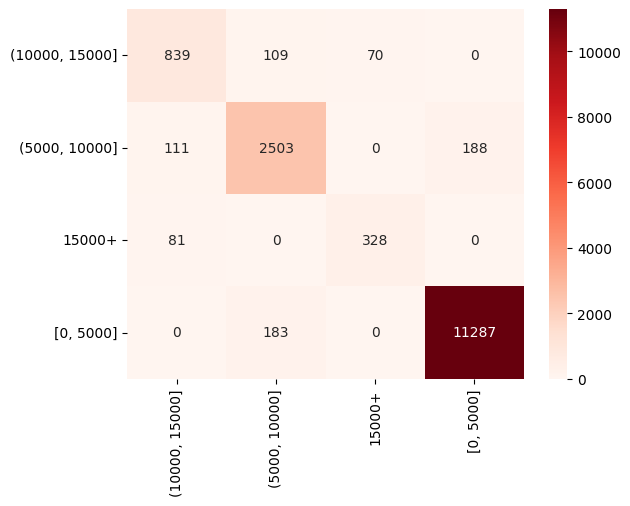

In [17]:
model_report(rfc, X_test, y_test)

carat : 17.017792204302474
clarity : 13.599592368212637
color : 11.270849923513145
cut : 1.376838890669063
depth : 3.541108087787803
table : 2.2610745189170833
x : 10.703176885207334
y : 15.594581034329455
z : 6.148504336552044
volume : 18.486481750508975


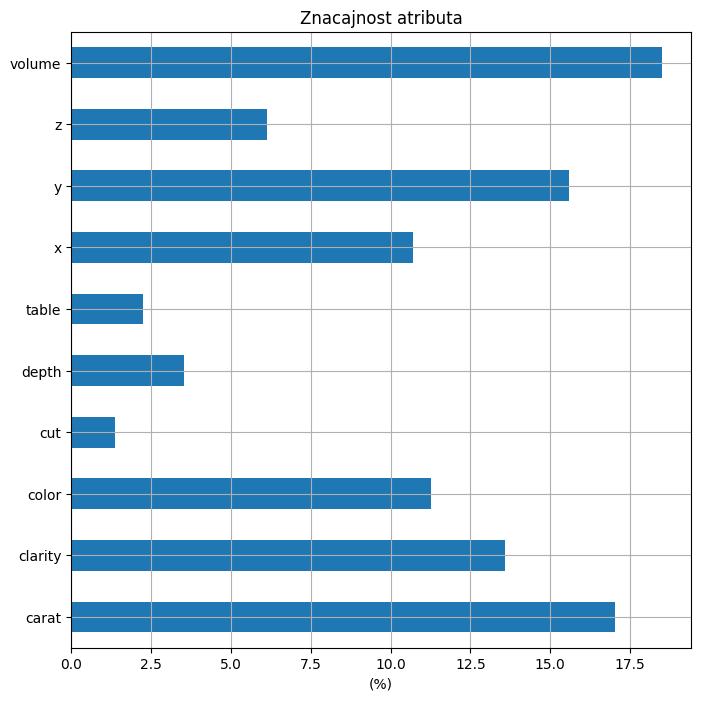

In [36]:
feature_importance(rfc)

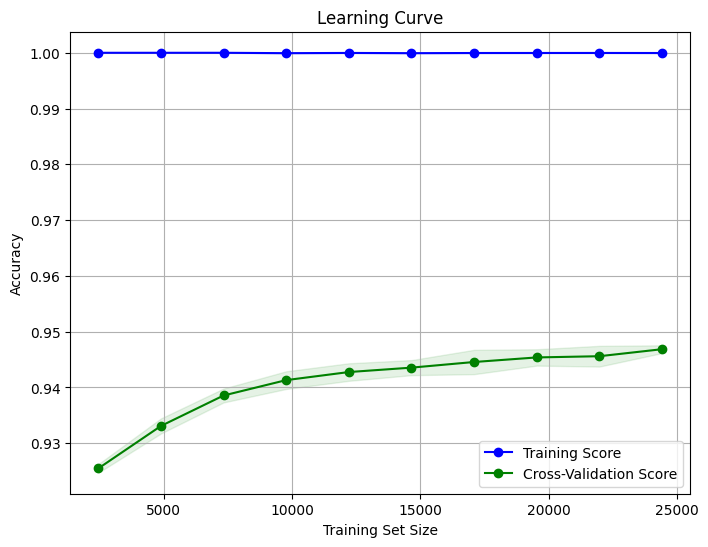

In [24]:
plot_learning_curve(rfc, X_train, y_train)

#### Hyperparameter tuning

In [28]:
params = {
    'model__n_estimators' : [20, 50, 150, 200],
    'model__criterion': ['gini', 'entropy']
}

In [29]:
grid = GridSearchCV(rfc, param_grid=params, scoring='accuracy', cv=3, verbose=4)

In [30]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END model__criterion=gini, model__n_estimators=20;, score=0.945 total time=   0.9s
[CV 2/3] END model__criterion=gini, model__n_estimators=20;, score=0.948 total time=   0.9s
[CV 3/3] END model__criterion=gini, model__n_estimators=20;, score=0.942 total time=   0.9s
[CV 1/3] END model__criterion=gini, model__n_estimators=50;, score=0.947 total time=   1.5s
[CV 2/3] END model__criterion=gini, model__n_estimators=50;, score=0.949 total time=   1.4s
[CV 3/3] END model__criterion=gini, model__n_estimators=50;, score=0.944 total time=   1.4s
[CV 1/3] END model__criterion=gini, model__n_estimators=150;, score=0.947 total time=   4.2s
[CV 2/3] END model__criterion=gini, model__n_estimators=150;, score=0.949 total time=   5.1s
[CV 3/3] END model__criterion=gini, model__n_estimators=150;, score=0.945 total time=   4.1s
[CV 1/3] END model__criterion=gini, model__n_estimators=200;, score=0.947 total time=   5.7s
[CV 2/3] END mod

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(class_weight={'(10000, 15000]': 15.625,
                                                                             '(5000, 10000]': 5.649717514124294,
                                                                             '15000+': 38.46153846153846,
                                                                             '[0, 5000]': 1.366120218579235},
                                                               random_state=42))]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__n_estimators': [20, 50, 150, 200]},
             scoring='accuracy', verbose=4)

In [31]:
grid.best_params_

{'model__criterion': 'gini', 'model__n_estimators': 200}

In [32]:
rfc_cv = grid.best_estimator_

Izvestaj o RandomForestClassifier modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.954073507866743
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.82      0.83      0.82      1018
 (5000, 10000]       0.90      0.90      0.90      2802
        15000+       0.83      0.80      0.82       409
     [0, 5000]       0.98      0.98      0.98     11470

      accuracy                           0.95     15699
     macro avg       0.88      0.88      0.88     15699
  weighted avg       0.95      0.95      0.95     15699

-------------------------------------------------------------------
Matrica konfuzije: 


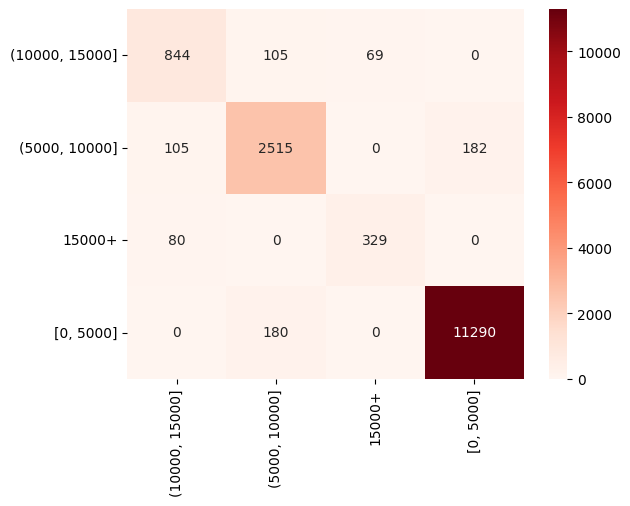

In [33]:
model_report(rfc_cv, X_test, y_test)

carat : 15.601227000481583
clarity : 13.419259235007939
color : 11.49138621576439
cut : 1.339353389038775
depth : 3.512823464358963
table : 2.2676595068529855
x : 11.11576125891903
y : 15.754125714907444
z : 7.553106294772259
volume : 17.945297919896646


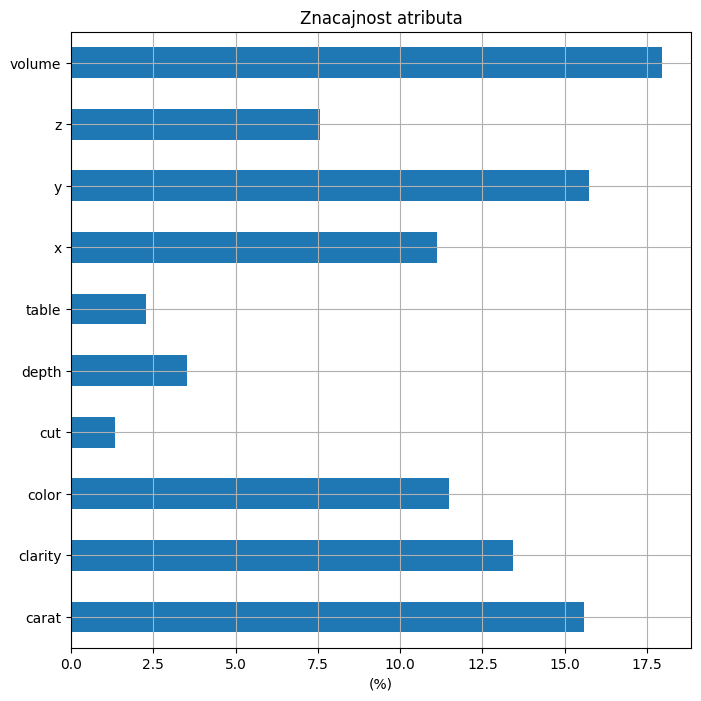

In [37]:
feature_importance(rfc_cv)

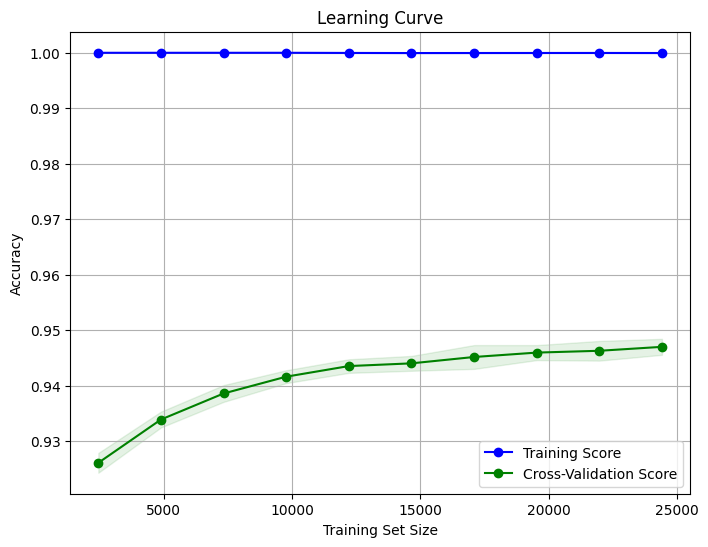

In [38]:
plot_learning_curve(rfc_cv, X_train, y_train)

***

### Now with PCA

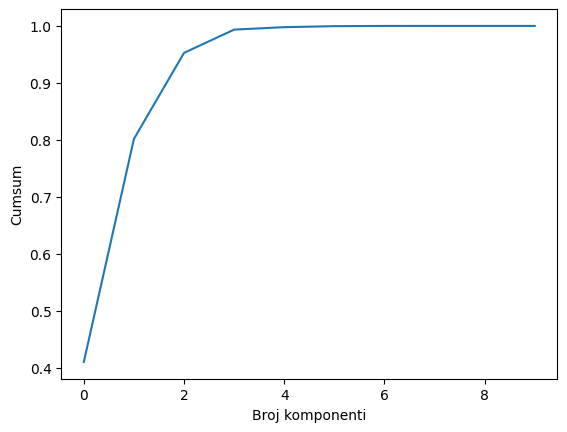

In [39]:
pca = PCA()

X_train_pca = pca.fit_transform(X_train)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Broj komponenti')
plt.ylabel('Cumsum')
plt.show()

In [40]:
rfc_pca = Pipeline([
    ('pca', PCA()),
    ('model', RandomForestClassifier(random_state = 42, class_weight = class_weights) )
])

In [41]:
params = {
    'model__n_estimators' : [20, 50, 150, 200, 250],
    'model__criterion': ['gini', 'entropy']
}

In [42]:
grid = GridSearchCV(rfc_pca, param_grid=params, scoring='accuracy', cv=3, verbose=4)

In [43]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END model__criterion=gini, model__n_estimators=20;, score=0.946 total time=   1.7s
[CV 2/3] END model__criterion=gini, model__n_estimators=20;, score=0.948 total time=   1.8s
[CV 3/3] END model__criterion=gini, model__n_estimators=20;, score=0.945 total time=   1.7s
[CV 1/3] END model__criterion=gini, model__n_estimators=50;, score=0.949 total time=   4.6s
[CV 2/3] END model__criterion=gini, model__n_estimators=50;, score=0.951 total time=   4.2s
[CV 3/3] END model__criterion=gini, model__n_estimators=50;, score=0.947 total time=   4.0s
[CV 1/3] END model__criterion=gini, model__n_estimators=150;, score=0.950 total time=  13.1s
[CV 2/3] END model__criterion=gini, model__n_estimators=150;, score=0.950 total time=  24.4s
[CV 3/3] END model__criterion=gini, model__n_estimators=150;, score=0.948 total time=  14.0s
[CV 1/3] END model__criterion=gini, model__n_estimators=200;, score=0.949 total time=  16.1s
[CV 2/3] END mo

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('model',
                                        RandomForestClassifier(class_weight={'(10000, 15000]': 15.625,
                                                                             '(5000, 10000]': 5.649717514124294,
                                                                             '15000+': 38.46153846153846,
                                                                             '[0, 5000]': 1.366120218579235},
                                                               random_state=42))]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__n_estimators': [20, 50, 150, 200, 250]},
             scoring='accuracy', verbose=4)

In [44]:
grid.best_params_

{'model__criterion': 'entropy', 'model__n_estimators': 250}

In [45]:
rfc_pca_cv = grid.best_estimator_

Izvestaj o RandomForestClassifier modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.9553474743614243
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.84      0.85      0.84      1018
 (5000, 10000]       0.90      0.90      0.90      2802
        15000+       0.84      0.85      0.84       409
     [0, 5000]       0.98      0.98      0.98     11470

      accuracy                           0.96     15699
     macro avg       0.89      0.89      0.89     15699
  weighted avg       0.96      0.96      0.96     15699

-------------------------------------------------------------------
Matrica konfuzije: 


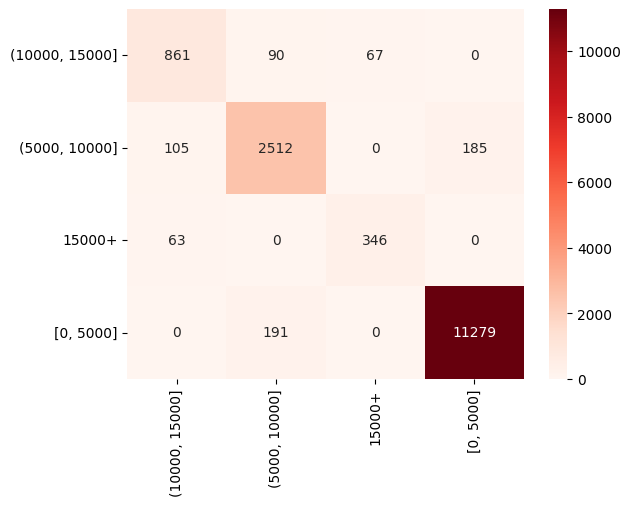

In [46]:
model_report(rfc_pca_cv, X_test, y_test)

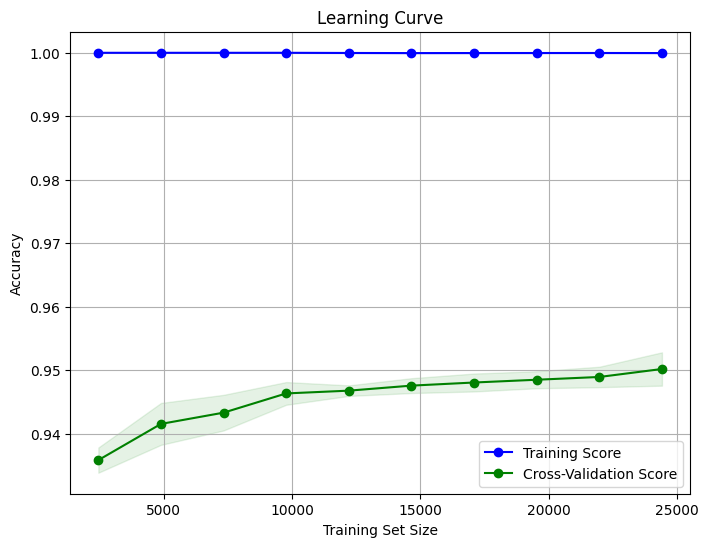

In [47]:
plot_learning_curve(rfc_pca_cv, X_train, y_train)

***

## Results:

In [48]:
model_names = ['rfc', 'rfc_cv', 'rfc_pca_cv']

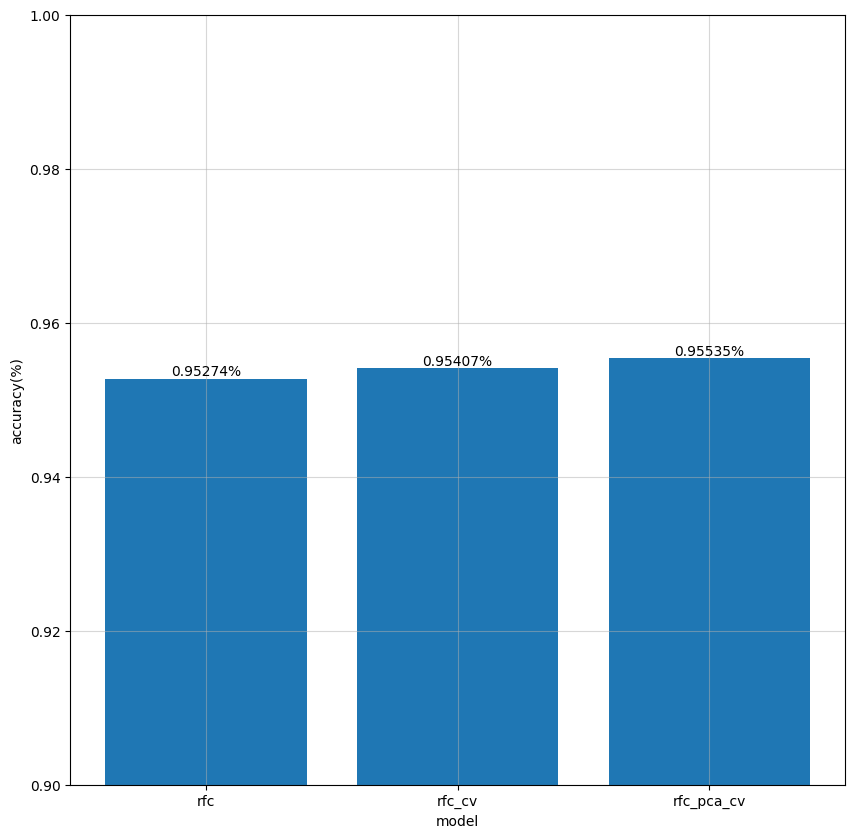

In [49]:
plt.figure(figsize=(10,10))
plt.bar(model_names, accuracy_scores)
plt.grid(alpha=0.5)
plt.ylim(0.9, 1.0)
for i, s in enumerate(accuracy_scores):
    plt.text(model_names[i], s, f'{s:.5f}%', ha='center', va='bottom')
plt.xlabel('model')
plt.ylabel('accuracy(%)')
plt.show()

S obzirom na rezultate, izabracemo **rfc_pca_cv** kao predstavnika **RandomForest**

In [50]:
joblib.dump(rfc_pca_cv, 'RFC.pkl')

['RFC.pkl']